# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


### Exercise 3A. The friendship paradox in BA networks

- Pick a node at random (e.g. use random.choice). Find its degree.
- Find *i*'s neighbors. And calculate their average degree.
- Compare the two numbers to check if *i*'s true that it's friends (on average) have more friends than *i*.
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

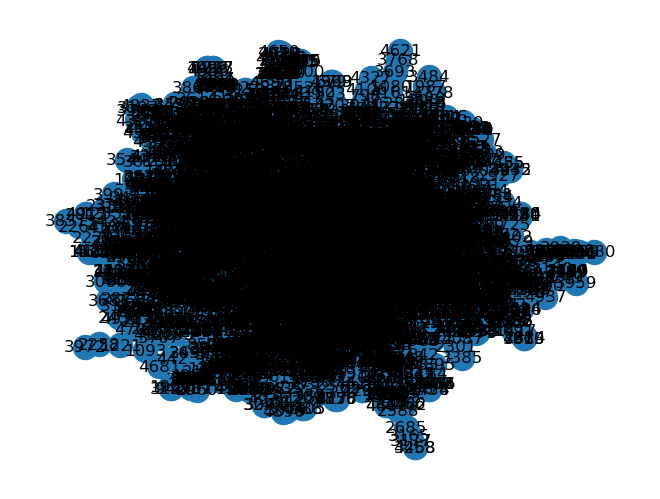

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph consisting of a single link
F_BA = nx.Graph()
F_BA.add_edge(0, 1)

# Add another node, connecting one of the existing nodes in proportion to their degree
F_BA.add_edge(1, 2) 

# Add until 5000 nodes and connect them to existing nodes in proportion to their degree
for i in range(2, 5000):
    nodes = list(F_BA.nodes())
    # Generate a list of edges
    edges = list(F_BA.edges())
    # Flatten the list of edges
    flat_edges = [node for edge in edges for node in edge]
    # Choose a node to connect to based on its degree
    chosen_node = random.choice(flat_edges)
    # Add the new node and connect it to the chosen node
    F_BA.add_edge(i, chosen_node)

# Plot the network
nx.draw(F_BA, with_labels=False)
plt.show()

In [2]:
# Pick a node i at random (e.g. use random.choice). Find its degree.
node = random.choice(list(F_BA.nodes()))
degree = F_BA.degree(node)
print(f"Degree of node {node}: {degree}")

# Find it's neighbors and calculate their average degree
neighbors = list(F_BA.neighbors(node))

# Compare the 2 numbers to check if its true that is friends (on average) have more friends than i
neighbor_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
print(f"Average degree of neighbors: {avg_neighbor_degree}")


Degree of node 1116: 2
Average degree of neighbors: 3.5


In [3]:
# Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?
count = 0
num_trials = 1000

for _ in range(num_trials):
    node = random.choice(list(F_BA.nodes()))
    degree = F_BA.degree(node)
    neighbors = list(F_BA.neighbors(node))
    neighbor_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    
    if avg_neighbor_degree > degree:
        count += 1

print(f"Friendship paradox holds in {count} out of {num_trials} trials.")

fraction = count / num_trials
print(f"Friendship Paradox Fraction: {fraction:.2f}")

Friendship paradox holds in 872 out of 1000 trials.
Friendship Paradox Fraction: 0.87


### Exercise 3B. The friendship paradox more generally
What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
- First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-warning">
ANSWER THE FIRST QUESTION !
</div>

In [4]:
import numpy as np

# Parameters
gamma = 2
n = 5000
xmin = 1

# Generate a power-law degree sequence using the transformation method
def generate_power_law_sequence(n, gamma, xmin):
    # Generate a random sample from the power-law distribution
    r = np.random.uniform(0, 1, n)
    degree_sequence = xmin * (1 - r) ** (-1 / (gamma - 1))
    
    # Round the degrees to the nearest integer
    degree_sequence = np.round(degree_sequence).astype(int)
    
    # Ensure the sum of degrees is even
    if np.sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1
    
    return degree_sequence

degree_sequence = generate_power_law_sequence(n, gamma, xmin)

# Generate a graph from the degree sequence
F_BA2 = nx.configuration_model(degree_sequence)

# Remove parallel edges and self-loops
F_BA2 = nx.Graph(F_BA2)
F_BA2.remove_edges_from(nx.selfloop_edges(F_BA2))

In [5]:
# Check the friendship paradox
count = 0

for _ in range(n):
    node = random.choice(list(F_BA2.nodes()))
    degree = F_BA2.degree(node)
    neighbors = list(F_BA2.neighbors(node))
    neighbor_degrees = [F_BA2.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    
    if avg_neighbor_degree > degree:
        count += 1

fraction = count / F_BA2.number_of_nodes()

print(f"Friendship paradox holds in {count} out of {n} nodes.")
print(f"Friendship Paradox Fraction: {fraction:.2f}")

Friendship paradox holds in 4881 out of 5000 nodes.
Friendship Paradox Fraction: 0.98


### Exercise 3C. The friendship paradox and the configuration model
- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
- What fraction of the time is the friendship paradox is true for the **F-CM** network?
- Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
    * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
    * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-warning">
ANSWER THIS !
</div>

### Exercise 3D. Growth without preferential attachment

Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success

1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
2. Generate an ER network of same number of nodes and links as the Sune-network. 
    * What are the differences between the ER network and the Sune-network? Explain in your own words. 
    * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

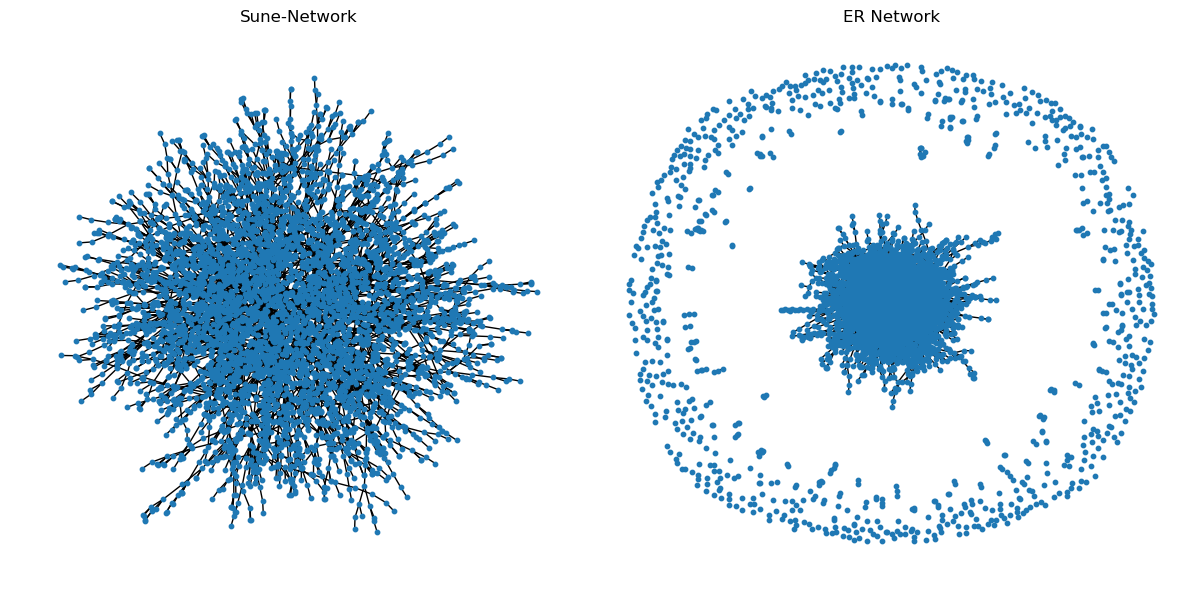

In [8]:
## Sune-Network
# Parameters
n = 5000  # number of nodes

# Initialize the network with a single link
G = nx.Graph()
G.add_edge(0, 1)

# Grow the network by adding nodes and connecting them to existing nodes with equal probability
for i in range(2, n):
    nodes = list(G.nodes())
    chosen_node = random.choice(nodes)
    G.add_edge(i, chosen_node)


## ER-Network
# Calculate the average degree of the network G
degrees = np.array([G.degree(n) for n in G.nodes()])
av_degree=degrees.mean()

# Calculate the probability p for the ER network
p =  av_degree/(n-1) 

# Generate an Erdős-Rényi (ER) network with the same number of nodes and edges as the previous network
ER = nx.erdos_renyi_graph(n, p)

# Plot both networks
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G, with_labels=False, node_size=10)
plt.title('Sune-Network')

plt.subplot(122)
nx.draw(ER, with_labels=False, node_size=10)
plt.title('ER Network')

plt.tight_layout()
plt.show()


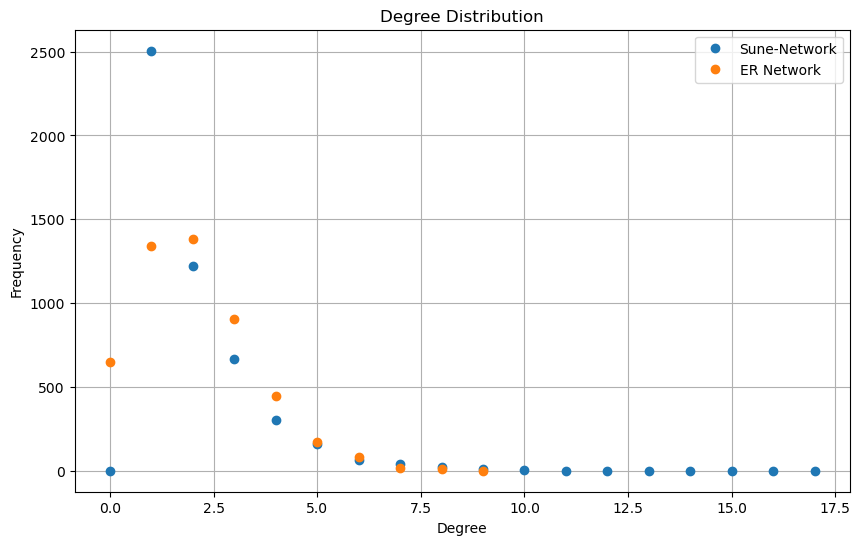

In [9]:
# Plot the two degree distribution. Compare and contrast. 

# Calculate the degree distribution of the Sune-Network
degree_sequence = [degree for node, degree in G.degree()]
degree_hist = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2))

# Calculate the degree distribution of the ER network
degree_sequence_ER = [degree for node, degree in ER.degree()]
degree_hist_ER = np.histogram(degree_sequence_ER, bins=range(max(degree_sequence_ER) + 2))

# Plot the degree distributions
plt.figure(figsize=(10, 6))

plt.plot(degree_hist[1][:-1], degree_hist[0], 'o', label='Sune-Network')
plt.plot(degree_hist_ER[1][:-1], degree_hist_ER[0], 'o', label='ER Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid()

plt.show()


In [10]:
# Calculate the number of connected components in the Sune-Network
num_components = nx.number_connected_components(G)
print(f"Number of connected components in Sune-Network: {num_components}")

# Calculate the number of connected components in the ER-Network
num_components_ER = nx.number_connected_components(ER)
print(f"Number of connected components in ER Network: {num_components_ER}")

Number of connected components in Sune-Network: 1
Number of connected components in ER Network: 778


<div class="alert alert-block alert-warning">
NOT SURE ABOUT THIS ONE! NEED TO EXPLAIN THEORY
</div>

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.